## Spacy (Industrial Strength Natural Language Processing)

## What is spaCy ?.
spaCy is a free, open-source library for advanced Natural Language Processing (NLP) in Python.
spaCy is designed specifically for production use and helps you build applications that process and “understand” large volumes of text.
It can be used to build information extraction or natural language understanding systems, or to pre-process text for deep learning.

## Features
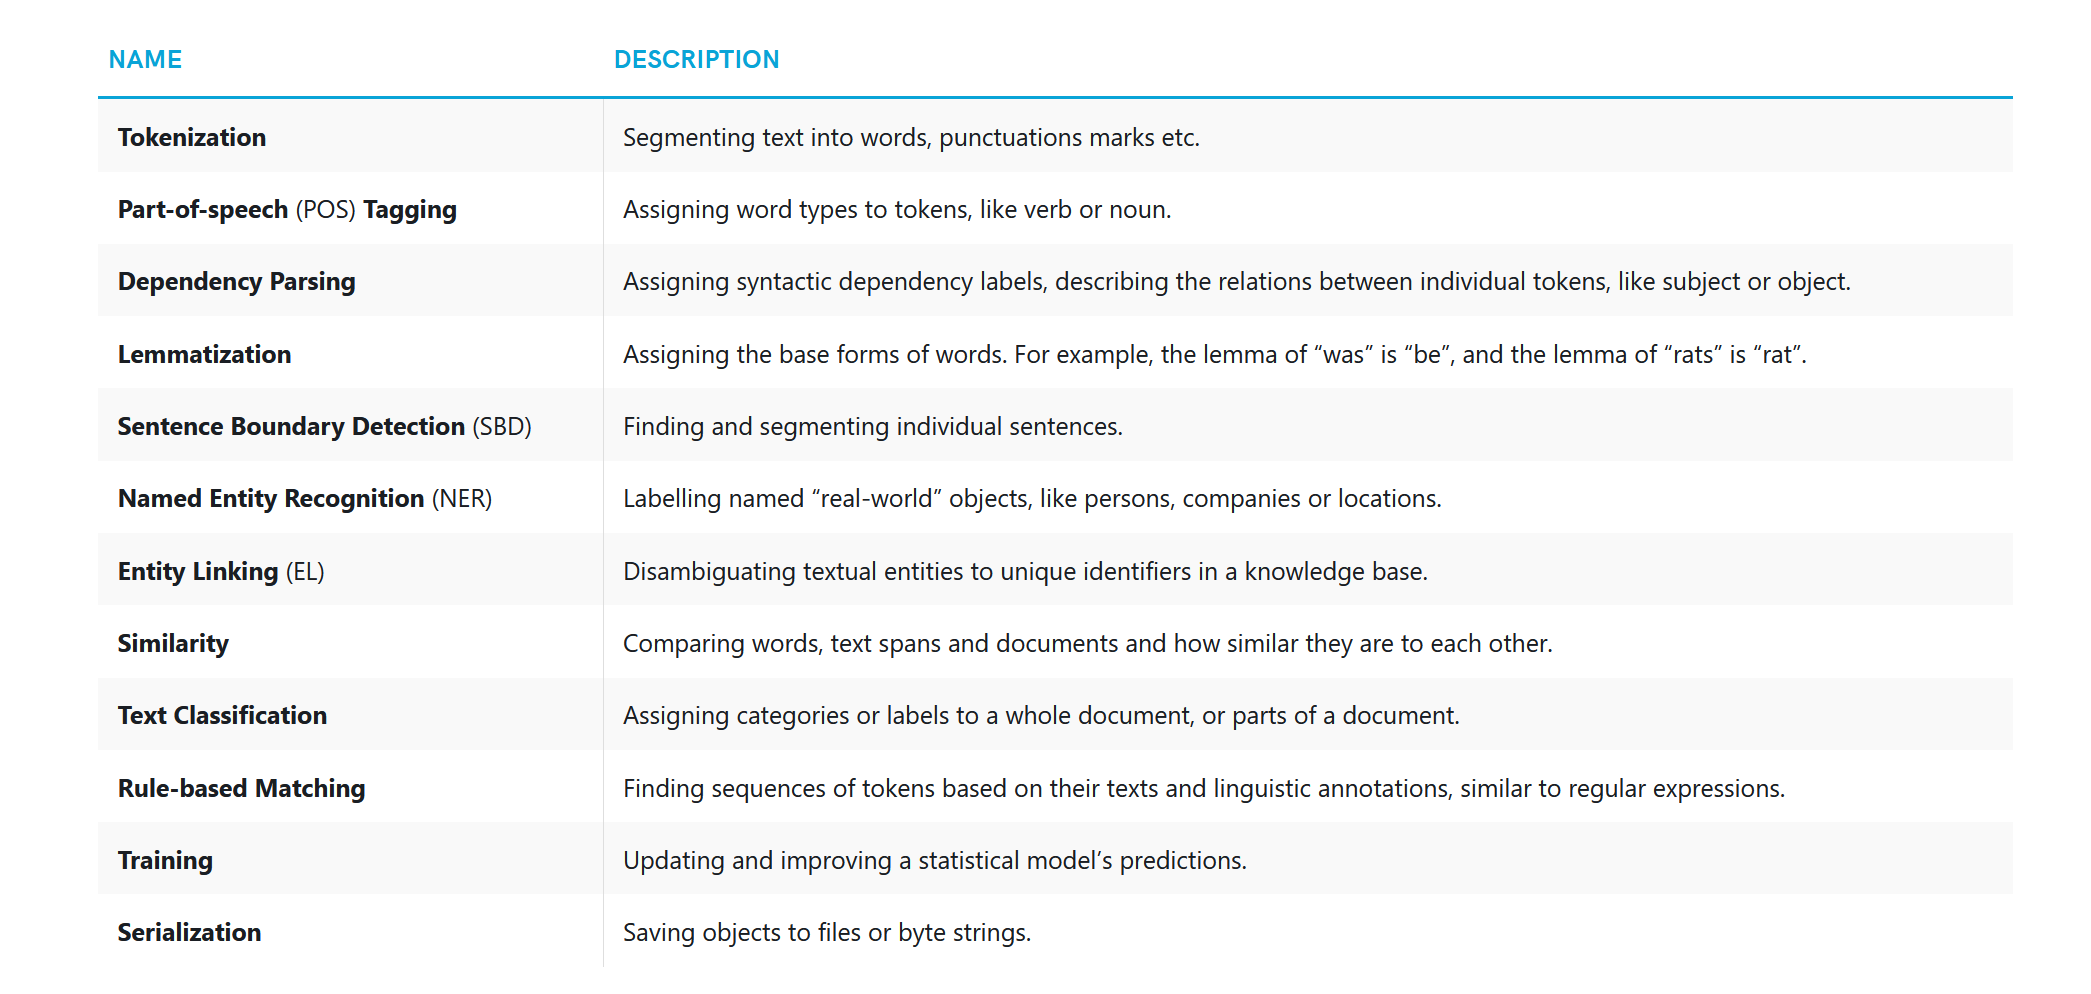


## Spacy Install

https://spacy.io/usage

```
en_core_web_sm
en_core_web_md
en_core_web_lg
```

In [47]:
%pip install -U pip setuptools wheel
%pip install -U spacy
%pip install beautifultable
%pip install nltk
!python -m spacy download en_core_web_sm 

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.

   ---------------------------------------- 1.5/1.5 MB 4.6 MB/s eta 0:00:00
   --------------------------------------- 302.2/302.2 kB 18.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
     --------------------------------------- 12.8/12.8 MB 13.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


## Linguistic Annotations
spaCy provides a variety of linguistic annotations to give you insights into a text’s grammatical structure.
This includes the word types, like the parts of speech, and how the words are related to each other. For example, if you’re analyzing text, it makes a huge difference whether a noun is the subject of a sentence, or the object – or whether “google” is used as a verb, or refers to the website or company in a specific context.

In [48]:
import spacy

nlp = spacy.load("en_core_web_sm") # returns language object
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")
for token in doc:
  print(token.text, token.pos_, token.dep_) # read spacy documentation for more information about what token.dep_ means

Apple PROPN nsubj
is AUX aux
looking VERB ROOT
at ADP prep
buying VERB pcomp
U.K. PROPN dobj
startup NOUN dep
for ADP prep
$ SYM quantmod
1 NUM compound
billion NUM pobj


Even though a Doc is processed – e.g. split into individual words and annotated – it still holds all information of the original text, like whitespace characters. 

This way, you’ll never lose any information when processing text with spaCy.

## Tokenization

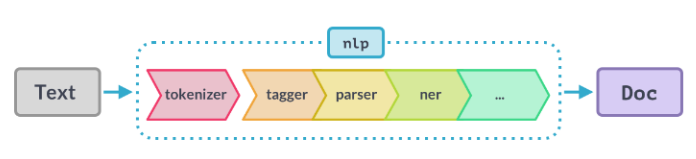

During processing, spaCy first tokenizes the text, i.e. segments it into words, punctuation and so on. This is done by applying rules specific to each language.

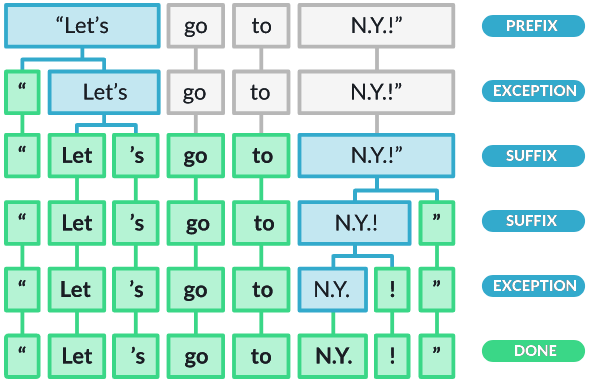

In [49]:
text = '''"Let's" go to N.Y.!"'''

In [50]:
import spacy
from beautifultable import BeautifulTable

In [51]:
nlp = spacy.load('en_core_web_sm')

In [52]:
doc = nlp(text)

In [53]:
table = BeautifulTable()
table.columns.header = ["text token", "POS"]
for token in doc:
  table.rows.append([token.text, token.pos_])
print(table)

+------------+-------+
| text token |  POS  |
+------------+-------+
|     "      | PUNCT |
+------------+-------+
|    Let     | VERB  |
+------------+-------+
|     's     | PRON  |
+------------+-------+
|     "      | PUNCT |
+------------+-------+
|     go     | VERB  |
+------------+-------+
|     to     |  ADP  |
+------------+-------+
|    N.Y.    | PROPN |
+------------+-------+
|     !      | PUNCT |
+------------+-------+
|     "      | PUNCT |
+------------+-------+


In [54]:
text = 'Apple is looking to buying U.K. startup for $1 billion.'
doc = nlp(text)
for token in doc:
  print(token.text)

Apple
is
looking
to
buying
U.K.
startup
for
$
1
billion
.


## Part of Speech (POS) Tagging & Dependency Parsing.

A trained component includes binary data that is produced by showing a system enough examples for it to make predictions that generalize across the language.

Available Attributes

https://spacy.io/api/token#attributes

Like many NLP libraries, spaCy encodes all strings to hash values to reduce memory usage and improve efficiency.


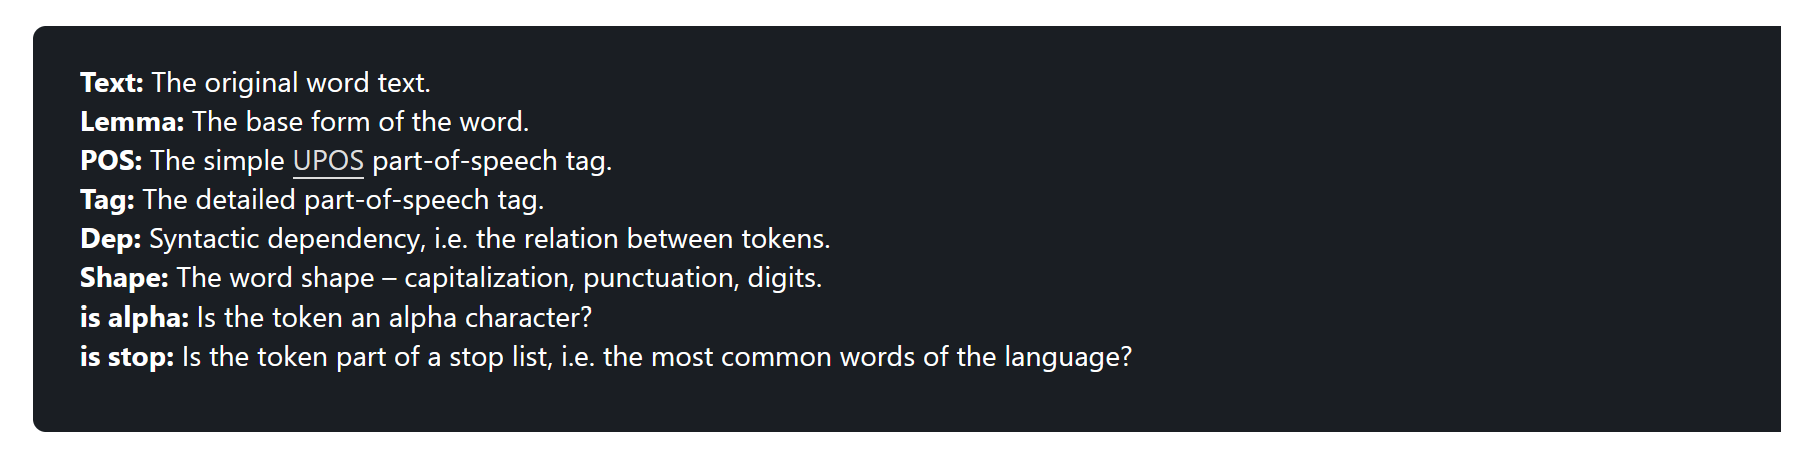


https://universaldependencies.org/u/pos/

A syntactic dependency is a relation between two words in a sentence with one word being the governor and the other being the dependent of the relation

In [55]:
import spacy

In [56]:
nlp = spacy.load('en_core_web_sm')

In [57]:
 
doc = nlp(text)

In [58]:
from beautifultable import BeautifulTable

In [59]:
table = BeautifulTable()

In [60]:
table.columns.header = ['text', 'POS', 'TAG', 'Explain Tag', 'Dep', 'Shape', 'is_alpha', 'is_stop']

for token in doc:
  table.rows.append([token.text, token.pos_, token.tag_, spacy.explain(token.tag_),token.dep_, token.shape_, token.is_alpha, token.is_stop])

In [61]:
# https://web.archive.org/web/20190206204307/https://www.clips.uantwerpen.be/pages/mbsp-tags
print(table)

+------+---------+-----+--------------------------+------+-------+------+------+
| text |   POS   | TAG |       Explain Tag        | Dep  | Shape | is_a | is_s |
|      |         |     |                          |      |       | lpha | top  |
+------+---------+-----+--------------------------+------+-------+------+------+
| Appl |  PROPN  | NNP |  noun, proper singular   | nsub | Xxxxx |  1   |  0   |
|  e   |         |     |                          |  j   |       |      |      |
+------+---------+-----+--------------------------+------+-------+------+------+
|  is  |   AUX   | VBZ | verb, 3rd person singula | aux  |  xx   |  1   |  1   |
|      |         |     |        r present         |      |       |      |      |
+------+---------+-----+--------------------------+------+-------+------+------+
| look |  VERB   | VBG | verb, gerund or present  | ROOT | xxxx  |  1   |  0   |
| ing  |         |     |        participle        |      |       |      |      |
+------+---------+-----+----

## Visualizing Dependency Parsing

Dependency parsing is the process of extracting the dependency parse of a sentence to represent its grammatical structure. It defines the dependency relationship between headwords and their dependents.

For reading more about dependency parsing, please refer # https://nlp.stanford.edu/software/dependencies_manual.pdf

In [62]:
from spacy import displacy

In [63]:
options = {"compact":True, "distance":100, "bg":"#0095b6", "color":"#DDDDDD", "font":"Source Sans Pro"}
displacy.render(doc, style='dep', jupyter=True, options=options)

## Sentence Boundary Detection

Sentence Detection is the process of locating the start and end of sentences in a given text.

In [64]:
para = '''Tap to Pay on ‌iPhone‌ is set to compete against existing ‌iPhone‌ payment solutions for merchants such as Square. It will let small businesses accept NFC contactless payments through supported iOS apps with an ‌iPhone‌ XS or newer. When checking someone out, the merchant will ask the customer to hold their own ‌iPhone‌, Apple Watch, digital wallet, or contactless card up to the merchant's ‌iPhone‌ to complete a payment quickly and easily.'''

In [65]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [66]:
doc = nlp(para)

In [67]:
sents = list(doc.sents)

In [68]:
len(sents)

3

In [69]:
for sent in sents:
  print(sent)

Tap to Pay on ‌iPhone‌ is set to compete against existing ‌iPhone‌ payment solutions for merchants such as Square.
It will let small businesses accept NFC contactless payments through supported iOS apps with an ‌iPhone‌ XS or newer.
When checking someone out, the merchant will ask the customer to hold their own ‌iPhone‌, Apple Watch, digital wallet, or contactless card up to the merchant's ‌iPhone‌ to complete a payment quickly and easily.


## Stop Words

Stop words are the most common words in a language. In the English language, some examples of stop words are the, are, but, and they

In [70]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [71]:
stopwords = spacy.lang.en.stop_words.STOP_WORDS

In [72]:
for sent in sents:
  # print(sent.text)
  for token in sent:
    if token.text not in stopwords:
      print(token)
  break

Tap
Pay
‌iPhone‌
set
compete
existing
‌iPhone‌
payment
solutions
merchants
Square
.


## Lemmatization

Lemmatization is the process of reducing inflected forms of a word while still ensuring that the reduced form belongs to the language.

This reduced form or root word is called a lemma.

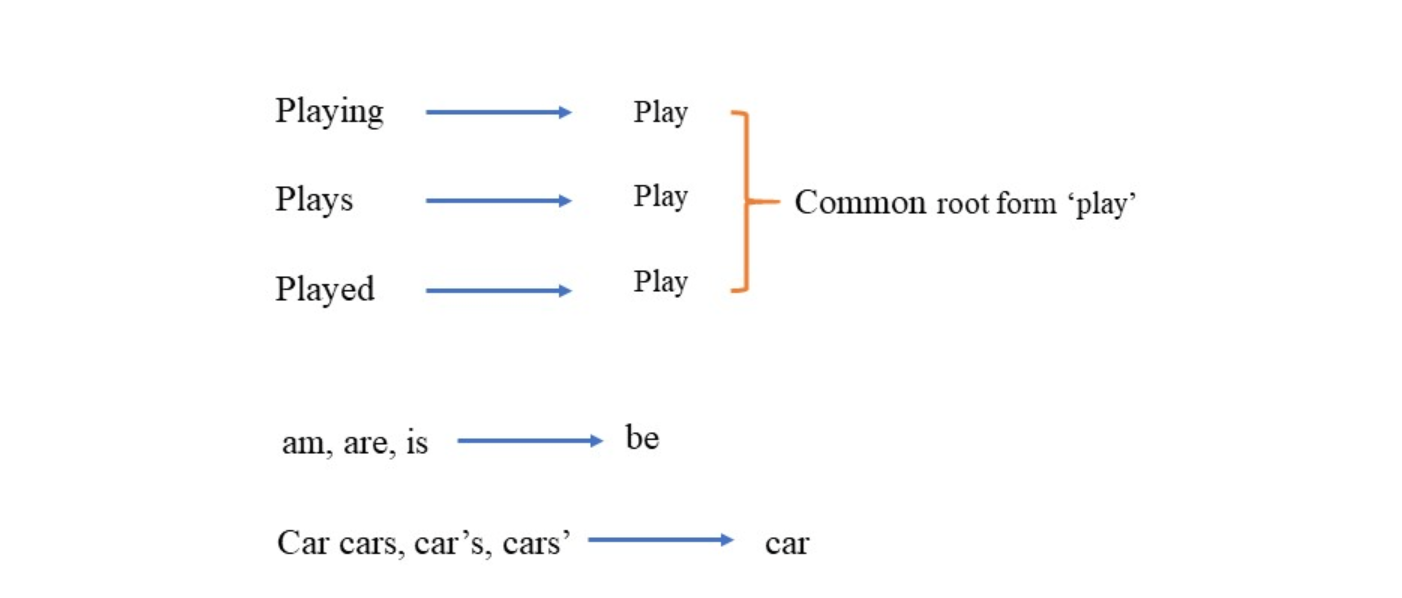

Lemmatization is necessary because it helps you reduce the inflected forms of a word so that they can be analyzed as a single item.

It can also help you normalize the text.

In [73]:
import spacy

In [74]:
nlp = spacy.load('en_core_web_sm')

In [75]:
text = ' i was playing' # i played

In [76]:
doc = nlp(text)

In [77]:
for token in doc:
  print(token.text, token.lemma_)

   
i I
was be
playing play


## Stemming words with NLTK

Stemming is the process of producing morphological variants of a root/base word

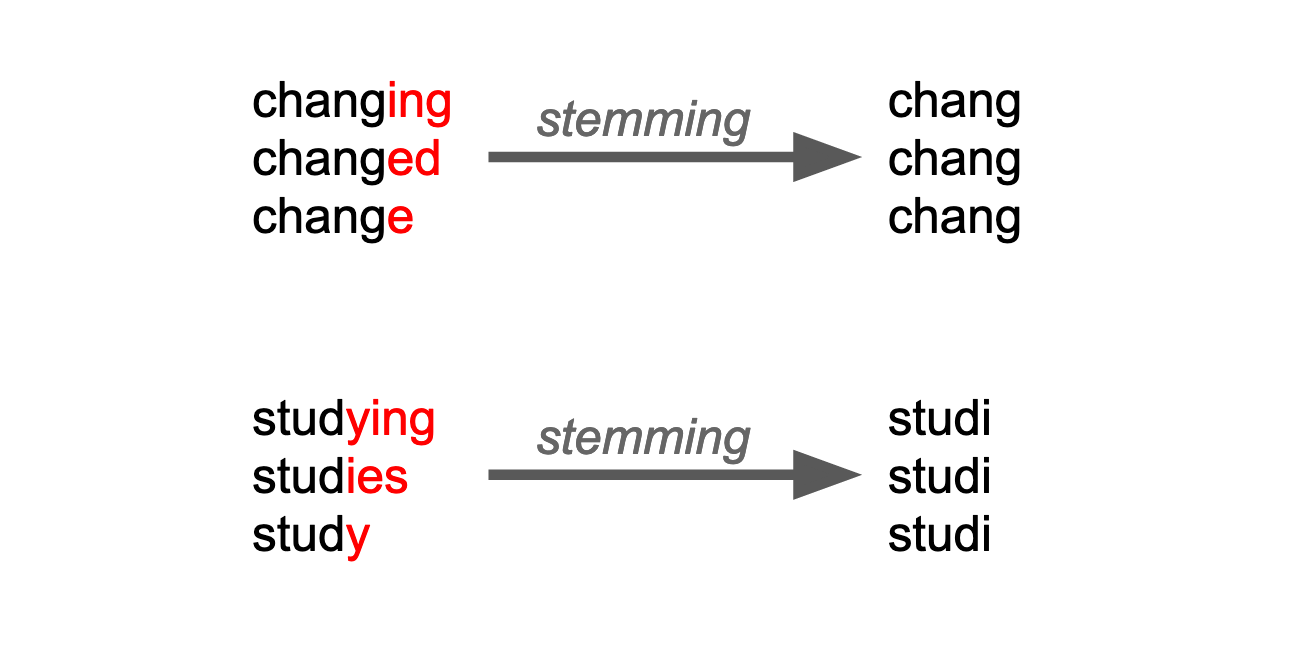

In [78]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [79]:
ps = PorterStemmer()

In [80]:
words = ['changing', 'changes', 'changed', 'change', 'study', 'studying']

In [81]:
%%timeit

for word in words:
  print(word, ": ", ps.stem(word))

changing :  chang
changes :  chang
changed :  chang
change :  chang
study :  studi
studying :  studi
changing :  chang
changes :  chang
changed :  chang
change :  chang
study :  studi
studying :  studi
changing :  chang
changes :  chang
changed :  chang
change :  chang
study :  studi
studying :  studi
changing :  chang
changes :  chang
changed :  chang
change :  chang
study :  studi
studying :  studi
changing :  chang
changes :  chang
changed :  chang
change :  chang
study :  studi
studying :  studi
changing :  chang
changes :  chang
changed :  chang
change :  chang
study :  studi
studying :  studi
changing :  chang
changes :  chang
changed :  chang
change :  chang
study :  studi
studying :  studi
changing :  chang
changes :  chang
changed :  chang
change :  chang
study :  studi
studying :  studi
changing :  chang
changes :  chang
changed :  chang
change :  chang
study :  studi
studying :  studi
changing :  chang
changes :  chang
changed :  chang
change :  chang
study :  studi
studying

In [82]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [83]:
%%timeit
for word in words:
  doc = nlp(word)
  for token in doc:
    print(word, ": ", token.lemma_)

changing :  change
changes :  change
changed :  change
change :  change
study :  study
studying :  study
changing :  change
changes :  change
changed :  change
change :  change
study :  study
studying :  study
changing :  change
changes :  change
changed :  change
change :  change
study :  study
studying :  study
changing :  change
changes :  change
changed :  change
change :  change
study :  study
studying :  study
changing :  change
changes :  change
changed :  change
change :  change
study :  study
studying :  study
changing :  change
changes :  change
changed :  change
change :  change
study :  study
studying :  study
changing :  change
changes :  change
changed :  change
change :  change
study :  study
studying :  study
changing :  change
changes :  change
changed :  change
change :  change
study :  study
studying :  study
changing :  change
changes :  change
changed :  change
change :  change
study :  study
studying :  study
changing :  change
changes :  change
changed :  change



## Word Frequency Count

This analysis can give you various insights about word patterns, such as common words or unique words in the text

In [84]:
text = "The deal can still fall through, though. As ongoing stock market volatility wipes millions in market cap from tech companies, Musk said he’s putting the deal on hold until he gets more clarity on how many fake accounts exist on Twitter. Analysts believe Musk may be using this debate to drive down his proposed $54 per share takeover price now that so much value has been drained from tech stocks over the past few weeks."

In [85]:
print(text)

The deal can still fall through, though. As ongoing stock market volatility wipes millions in market cap from tech companies, Musk said he’s putting the deal on hold until he gets more clarity on how many fake accounts exist on Twitter. Analysts believe Musk may be using this debate to drive down his proposed $54 per share takeover price now that so much value has been drained from tech stocks over the past few weeks.


In [86]:
from collections import Counter

In [87]:
word_frq = Counter(text.split())

In [88]:
word_frq.most_common(5)

[('on', 3), ('deal', 2), ('market', 2), ('from', 2), ('tech', 2)]

In [89]:
import spacy

In [90]:
nlp = spacy.load('en_core_web_sm')

In [91]:
doc = nlp(text)

In [92]:
words = [token.text for token in doc if not token.is_stop and not token.is_punct]

In [93]:
word_frq = Counter(words)

In [94]:
word_frq.most_common(5)

[('deal', 2), ('market', 2), ('tech', 2), ('Musk', 2), ('fall', 1)]